In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [ ]:
datadir = "/content/drive/MyDrive/faceid"

[[196 197 197 ... 185 184 177]
 [197 197 197 ... 185 183 176]
 [197 197 197 ... 186 184 175]
 ...
 [ 81 105 104 ... 163 165 160]
 [ 90  86  71 ... 165 163 151]
 [ 46  32  36 ... 161 157 141]]


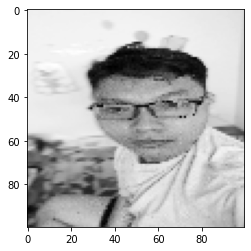

In [ ]:
categories=['Dung','Long','Thien']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 50/50 [00:01<00:00, 31.40it/s]

150


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (150, 100, 100, 1)
y (150,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/faceid/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/faceid/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/faceid/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/faceid/Save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (150, 100, 100, 1)
y (150,)


In [ ]:
y= to_categorical(y,10)


In [ ]:
y.shape

(150, 10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
2/2 [==============================] - 1s 272ms/step - loss: 1.7814 - accuracy: 0.4167 - val_loss: 4.2966 - val_accuracy: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 91ms/step - loss: 1.4025 - accuracy: 0.3750 - val_loss: 3.1756 - val_accuracy: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 76ms/step - loss: 1.3809 - accuracy: 0.4833 - val_loss: 4.6248 - val_accuracy: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 70ms/step - loss: 1.3571 - accuracy: 0.4167 - val_loss: 2.8668 - val_accuracy: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 72ms/step - loss: 1.2635 - accuracy: 0.4167 - val_loss: 3.2180 - val_accuracy: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 72ms/step - loss: 1.2193 - accuracy: 0.4167 - val_loss: 3.5307 - val_accuracy: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 72ms/step - loss: 1.1947 - accuracy: 0.4167 - val_loss: 3.0062 - val_accuracy: 0.

In [ ]:
model.save('faceid.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Dung',  1: 'Long',2: 'Thien'}
model = load_model('faceid.h5')

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dung


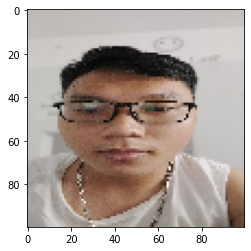

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Dung/20.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Long


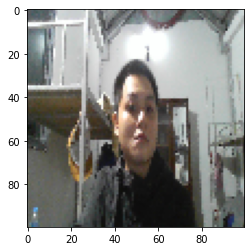

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Long/1 (50).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dung


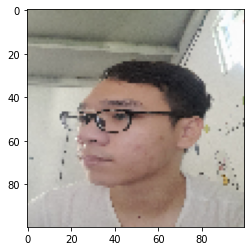

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Thien/11.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dung


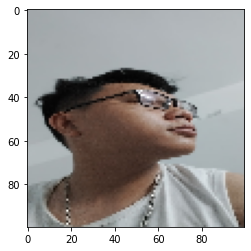

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Dung/14.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Long


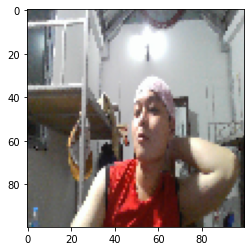

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Long/1 (15).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation Thien


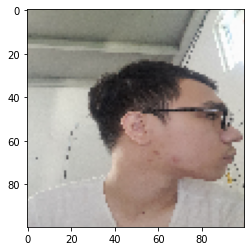

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/faceid/Thien/09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])